Author:Ruochen Pi

UID:500055496

Group 174

Update Time: 2022/4/7


Hardware and software specifications of the computer:
Processor: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz (8 CPUs), ~2.0GHz
Memory: 16384MB RAM
Available OS Memory: 16226MB RAM


# 1. input data

In [3]:
import pandas as pd
import os
import numpy as np
print(os.listdir("./Input/train"))
pd.set_option('display.max_columns', 10)

['train.csv']


In [4]:
# train.csv including feature and label using for training model.
data_train_df = pd.read_csv('./Input/train/train.csv')

# test_input.csv includes 5000 samples used for label prediction. Test samples do not have labels.
data_test_df = pd.read_csv('./Input/test/test_input.csv', index_col=0) 

In [5]:
data_train_df.head()

,id,v1,v2,v3,v4,...,v781,v782,v783,v784,label
0,0,0,0,0,0,...,0,0,0,0,2
1,1,0,0,0,0,...,0,0,0,0,1
2,2,0,0,0,0,...,0,0,0,0,1
3,3,0,0,0,1,...,0,0,0,0,4
4,4,0,0,0,0,...,0,0,0,0,8


In [6]:
data_test_df.head()

,v1,v2,v3,v4,v5,...,v780,v781,v782,v783,v784
id,,,,,,,,,,,
0,0,0,0,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,0,0,0,...,0,0,0,0,0


In [7]:
 # Selecting input feature
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()
 # Selecting test feature
data_test_feature = data_test_df.loc[:, "v1":"v784"].to_numpy()
# Selecting output lable
data_train_label = data_train_df.label.to_numpy()

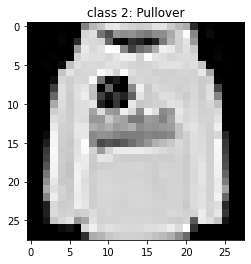

In [8]:
import matplotlib.pyplot as plt
data_train_feature = data_train_feature.reshape((data_train_feature.shape[0], 28, 28))
plt.imshow(data_train_feature[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(data_train_label[0]) + ": Pullover" )
plt.show()

In [9]:
data_test_df.head()

,v1,v2,v3,v4,v5,...,v780,v781,v782,v783,v784
id,,,,,,,,,,,
0,0,0,0,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,0,0,0,...,0,0,0,0,0


# 2. prediction

In [10]:

# prediction on the test data
# normalization


#def norm(data):
#    min = data.min(axis=0)
#    max = data.max(axis=0)
#    norm_result = (data-min)/(max-min)
#    return norm_result

#train_norm = norm(data_train_feature)

data_train_feature = data_train_feature.reshape((data_train_feature.shape[0],-1))
Train_Num=data_train_feature.shape[0]
data_test_feature = data_test_feature.reshape((data_test_feature.shape[0],-1))
data_all=np.vstack((data_train_feature,data_test_feature)) 
# In[35]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_all)

all_norm = scaler.transform(data_all)
train_norm = all_norm[:Train_Num,:]
test_norm = all_norm[Train_Num:,:]


In [11]:
data_train_feature[0]


array([  0,   0,   0,   0,   1,   0,   0, 131, 184, 199, 229, 234, 217,
       212, 204, 208, 226, 227, 203, 185, 173,  44,   0,   4,   0,   0,
         0,   0,   0,   0,   0,   0,   2,   0,   0, 214, 224, 116,  78,
       149, 141, 148, 131, 121, 141, 141, 169, 212, 251, 136,   0,  10,
         0,   0,   0,   0,   0,   0,   1,   0,   5,   0,  43, 220, 217,
       213, 104,  13,   6,  49,  36,  11,  37, 121, 179, 208, 227, 155,
         0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0, 155,
       233, 217, 226, 255, 252, 133,  64, 109, 127, 175, 240, 232, 209,
       224, 204,   0,   0,   3,   0,   0,   0,   0,   0,   0,   3,   0,
         0, 212, 227, 223, 223, 217, 230, 241, 237, 210, 252, 229, 222,
       213, 218, 221, 216,   0,   0,   7,   0,   0,   0,   0,   0,   3,
         0,  13, 193, 223, 215, 218, 215, 224, 225, 219, 213, 209, 212,
       217, 225, 225, 224, 217, 223, 198,   0,   0,   2,   0,   0,   0,
         0,   0,   0, 197, 227, 211, 216, 215, 251, 236, 212, 25

In [12]:
train_norm[0]

array([0.        , 0.        , 0.        , 0.        , 0.00505051,
       0.        , 0.        , 0.59817352, 0.75720165, 0.78039216,
       0.89803922, 0.91764706, 0.85098039, 0.83137255, 0.8       ,
       0.81568627, 0.88627451, 0.89019608, 0.79607843, 0.7254902 ,
       0.68924303, 0.17254902, 0.        , 0.01818182, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00784314, 0.        , 0.        ,
       0.83921569, 0.87843137, 0.45490196, 0.30588235, 0.58431373,
       0.55294118, 0.58039216, 0.51372549, 0.4745098 , 0.55294118,
       0.55294118, 0.6627451 , 0.83137255, 0.98431373, 0.53333333,
       0.        , 0.03921569, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00425532, 0.        ,
       0.01960784, 0.        , 0.16862745, 0.8627451 , 0.85098039,
       0.83529412, 0.40784314, 0.05098039, 0.02352941, 0.19215686,
       0.14117647, 0.04313725, 0.14509804, 0.4745098 , 0.70196

In [25]:
# PCA (after normalization)
#train_norm = train_norm.reshape((train_norm.shape[0],-1))

#from sklearn.decomposition import PCA
#pca = PCA(n_components = 200)
#train_norm_pca = pca.fit_transform(train_norm)

#test_norm_pca = pca.fit_transform(test_norm)



In [29]:
# seperate data into training and validation set (train:test 8:2)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_norm_pca, data_train_label, test_size = 0.01, random_state = 100)


print('X_train',X_train.shape)
print('X_valid',X_valid.shape)
print('y_train',y_train.shape)
print('y_valid',y_valid.shape)

X_train (29700, 200)
X_valid (300, 200)
y_train (29700,)
y_valid (300,)


# 3. classifier

In [15]:
#K-fold method
#from sklearn.model_selection import StratifiedKFold

#get accuracy
#from sklearn.metrics import accuracy_score

#made pic
#import matplotlib.pyplot as plt

#running time
#from time import time

#import numpy as np

#from sklearn import svm, datasets
#from sklearn.model_selection import GridSearchCV

# 3.1 KNN classifier

In [30]:
# use KNN classifier atfer paramenter tunning
from time import time
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

#K-fold method
#from sklearn.model_selection import StratifiedKFold

#set parameter
para_grid_knn = {'n_neighbors':[3,4,5,6,7,8],'p':[1,2]}
#10-fold method
#cvKFold_knn = StratifiedKFold(n_splits = 10, shuffle = True)

#store data
time_knn = []
acc_knn = []

#grid search
for p in para_grid_knn["p"]:
    acc_mean = []
    time_list = []
    for n_neighbors in para_grid_knn["n_neighbors"]:
            acc= []
            start = time()
            
            knn = KNeighborsClassifier(n_neighbors = n_neighbors, p = p)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_valid)
            acc.append(accuracy_score(y_pred,y_valid))
            acc_mean.append(np.around(np.mean(acc)*100,2))
            time_list.append(time()-start)
            print("n_neighbors = %d, p = %d, Accuracy = %.2f%%, running time = %.2fs"%(n_neighbors,p,acc_mean[-1],time_list[-1]))
    acc_knn.append(acc_mean)
    time_knn.append(time_list)


n_neighbors = 3, p = 1, Accuracy = 86.33%, running time = 1.96s
n_neighbors = 4, p = 1, Accuracy = 86.00%, running time = 1.94s
n_neighbors = 5, p = 1, Accuracy = 85.33%, running time = 1.92s
n_neighbors = 6, p = 1, Accuracy = 85.00%, running time = 1.93s
n_neighbors = 7, p = 1, Accuracy = 85.67%, running time = 1.95s
n_neighbors = 8, p = 1, Accuracy = 85.00%, running time = 1.92s
n_neighbors = 3, p = 2, Accuracy = 86.00%, running time = 0.22s
n_neighbors = 4, p = 2, Accuracy = 86.00%, running time = 0.25s
n_neighbors = 5, p = 2, Accuracy = 85.33%, running time = 0.26s
n_neighbors = 6, p = 2, Accuracy = 86.33%, running time = 0.24s
n_neighbors = 7, p = 2, Accuracy = 85.33%, running time = 0.26s
n_neighbors = 8, p = 2, Accuracy = 85.67%, running time = 0.24s


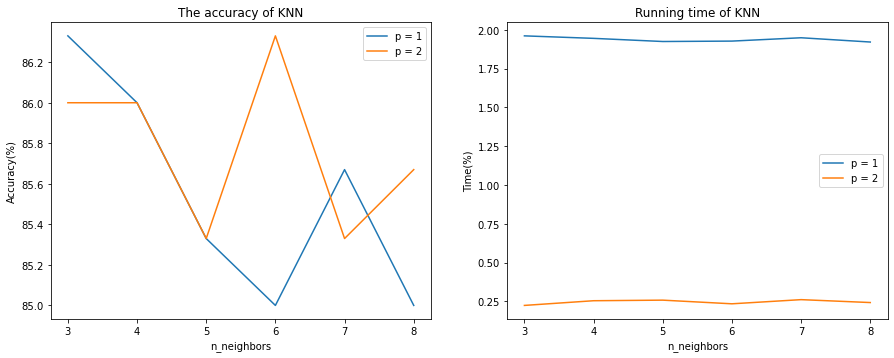

In [31]:
plt.figure(figsize = (15,12))

plt.subplot(2,2,1)
plt.plot(para_grid_knn["n_neighbors"],acc_knn[0])
plt.plot(para_grid_knn["n_neighbors"],acc_knn[1])
plt.legend(["p = 1","p = 2"])
plt.xticks(para_grid_knn["n_neighbors"])
plt.title("The accuracy of KNN")
plt.ylabel("Accuracy(%)")
plt.xlabel("n_neighbors")   
           
plt.subplot(2,2,2)
plt.plot(para_grid_knn["n_neighbors"],time_knn[0])
plt.plot(para_grid_knn["n_neighbors"],time_knn[1])
plt.legend(["p = 1","p = 2"])
plt.xticks(para_grid_knn["n_neighbors"])
plt.title("Running time of KNN")
plt.ylabel("Time(%)")
plt.xlabel("n_neighbors")   

plt.show()

In [17]:
import time
###KNN with 5 fold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
KNN_score=[]
KNN_time=[]
kfold = KFold(n_splits=5)
knnscore_sum=0

for train_index, test_index in kfold.split(X_train, y_train):
    this_train_x, this_train_y = X_train[train_index], y_train[train_index]  
    this_test_x, this_test_y = X_train[test_index], y_train[test_index]  
    KNNclassifier = KNeighborsClassifier(n_neighbors = 6, p = 1)
    KNNclassifier.fit(this_train_x, this_train_y)
    prediction = KNNclassifier.predict(this_test_x)
    score = accuracy_score(this_test_y, prediction)
    print(score)
    KNN_score.append(score)
    start=time.time()
    prediction = KNNclassifier.predict(test_norm)
    end=time.time()
    print('Finish classifying, it takes '+str(end-start)+'s')
    KNN_time.append(end-start)
    knnscore_sum = knnscore_sum + score

0.8511784511784511
Finish classifying, it takes 159.8613338470459s
0.8430976430976431
Finish classifying, it takes 181.5887725353241s
0.8577441077441077
Finish classifying, it takes 154.08210062980652s
0.847979797979798
Finish classifying, it takes 155.83111786842346s
0.8501683501683501
Finish classifying, it takes 175.1950855255127s


In [18]:
knnscore_sum/5

0.8500336700336699

# 3.2 SVM classifier

In [19]:
###SVM with 5 fold
from sklearn import svm

from sklearn.model_selection import KFold
SVM_score=[]
SVM_time=[]
kfold = KFold(n_splits=5)
svmscore_sum=0

for train_index, test_index in kfold.split(X_train, y_train):
    this_train_x, this_train_y = X_train[train_index], y_train[train_index]  
    this_test_x, this_test_y = X_train[test_index], y_train[test_index]  
    SVMclassifier = svm.LinearSVC(max_iter=5000,dual=False)
    SVMclassifier.fit(this_train_x, this_train_y)
    prediction = SVMclassifier.predict(this_test_x)
    score = accuracy_score(this_test_y, prediction)
    print(score)
    SVM_score.append(score)
    start=time.time()
    prediction = SVMclassifier.predict(test_norm)
    end=time.time()
    print('Finish classifying, it takes '+str(end-start)+'s')
    SVM_time.append(end-start)
    svmscore_sum = svmscore_sum + score

0.8388888888888889
Finish classifying, it takes 0.009974241256713867s
0.8294612794612795
Finish classifying, it takes 0.009477853775024414s
0.8420875420875421
Finish classifying, it takes 0.00803828239440918s
0.8373737373737373
Finish classifying, it takes 0.007039546966552734s
0.8292929292929293
Finish classifying, it takes 0.009000062942504883s


In [20]:
svmscore_sum/5

0.8354208754208754

# 3.3 logistic regression

In [35]:
#LR parameter tunning
from sklearn.linear_model import LogisticRegression


#set parameter
para_grid_lr = {'max_iter': [100,200,300],'penalty' : ['l1','l2']}

#store data
time_lr = []
acc_lr = []

#grid search

for penalty in para_grid_lr["penalty"]:
    acc_mean = []
    time_list = []
    for max_iter in para_grid_lr["max_iter"]:
            acc= []
            start = time()
            
            #classifier
            lr = LogisticRegression(max_iter = max_iter, penalty = penalty,C = 1, solver = 'liblinear')
            lr.fit(X_train, y_train)
            
            #get acc and time
            y_pred = lr.predict(X_valid)
            acc.append(accuracy_score(y_pred,y_valid))
            acc_mean.append(np.mean(acc)*100)
            time_list.append(time()-start)
            print("max_iter = %d, penalty = %s, Accuracy = %.2f%%, running time = %.2fs"%(max_iter,penalty,acc_mean[-1],time_list[-1]))
    acc_lr.append(acc_mean)
    time_lr.append(time_list)

max_iter = 100, penalty = l1, Accuracy = 83.00%, running time = 179.74s
max_iter = 200, penalty = l1, Accuracy = 83.00%, running time = 210.94s
max_iter = 300, penalty = l1, Accuracy = 83.00%, running time = 203.95s
max_iter = 100, penalty = l2, Accuracy = 82.67%, running time = 43.65s
max_iter = 200, penalty = l2, Accuracy = 82.67%, running time = 47.22s
max_iter = 300, penalty = l2, Accuracy = 82.67%, running time = 45.09s


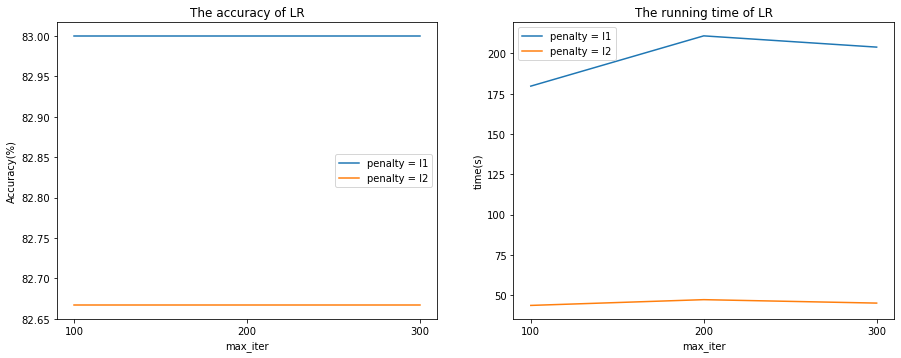

In [36]:
plt.figure(figsize = (15,12))

plt.subplot(2,2,1)
plt.plot(para_grid_lr["max_iter"],acc_lr[0])
plt.plot(para_grid_lr["max_iter"],acc_lr[1])
plt.legend(["penalty = l1","penalty = l2"])
plt.xticks(para_grid_lr["max_iter"])
plt.title("The accuracy of LR")
plt.ylabel("Accuracy(%)")
plt.xlabel("max_iter")   
           
plt.subplot(2,2,2)
plt.plot(para_grid_lr["max_iter"],time_lr[0])
plt.plot(para_grid_lr["max_iter"],time_lr[1])
plt.legend(["penalty = l1","penalty = l2"])
plt.xticks(para_grid_lr["max_iter"])
plt.title("The running time of LR")
plt.ylabel("time(s)")
plt.xlabel("max_iter")   

plt.show()


In [21]:
###logistic regression(LR) with 5 fold
from sklearn.linear_model import LogisticRegression
#
import time
from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

LR_score=[]
LR_time=[]
kfold = KFold(n_splits=5)
lrscore_sum=0
for train_index, test_index in kfold.split(X_train, y_train):
    this_train_x, this_train_y = X_train[train_index], y_train[train_index]  
    this_test_x, this_test_y = X_train[test_index], y_train[test_index]  
    
    LRclassifier = LogisticRegression(solver='liblinear',
                                      max_iter=300,penalty='l2',tol=0.001)
    LRclassifier.fit(this_train_x,this_train_y)
    prediction = LRclassifier.predict(this_test_x)      

    score = accuracy_score(this_test_y, prediction)
    print(score)
    LR_score.append(score)
    start=time.time()
    prediction = LRclassifier.predict(test_norm)
    end=time.time()
    print('Finish classifying, it takes '+str(end-start)+'s')
    LR_time.append(end-start)
    lrscore_sum = lrscore_sum+score

0.8486531986531987
Finish classifying, it takes 0.007008552551269531s
0.8393939393939394
Finish classifying, it takes 0.011997222900390625s
0.8501683501683501
Finish classifying, it takes 0.0070073604583740234s
0.8459595959595959
Finish classifying, it takes 0.007952690124511719s
0.8412457912457912
Finish classifying, it takes 0.009002447128295898s


In [22]:
lrscore_sum/5

0.845084175084175

# 3.4 Random forest

In [39]:
# Random forest classifier 
from sklearn.ensemble import RandomForestClassifier



#set parameter
para_grid_rf = {'max_depth':[7,9,11],'random_state':[0,2]}

#store data
time_rf = []
acc_rf = []

#grid searc
for random_state in para_grid_rf["random_state"]:
    acc_mean = []
    time_list = []
    for max_depth in para_grid_rf["max_depth"]:
            acc= []
            start = time()
            
            #classifier
            rf = RandomForestClassifier( max_depth= max_depth,random_state =random_state, n_estimators=500)
            rf.fit(X_train, y_train)
            
            #get acc and time
            y_pred = lr.predict(X_valid)
            acc.append(accuracy_score(y_pred,y_valid))
            acc_mean.append(np.around(np.mean(acc)*100,4))
            time_list.append(time()-start)
            print("max_depth = %d, random_state = %d, Accuracy = %.2f%%, running time = %.2fs"%(max_depth,random_state,acc_mean[-1],time_list[-1]))
    acc_rf.append(acc_mean)
    time_rf.append(time_list)


max_depth = 7, random_state = 0, Accuracy = 82.67%, running time = 121.19s
max_depth = 9, random_state = 0, Accuracy = 82.67%, running time = 158.98s
max_depth = 11, random_state = 0, Accuracy = 82.67%, running time = 184.65s
max_depth = 7, random_state = 2, Accuracy = 82.67%, running time = 123.55s
max_depth = 9, random_state = 2, Accuracy = 82.67%, running time = 169.79s
max_depth = 11, random_state = 2, Accuracy = 82.67%, running time = 166.82s


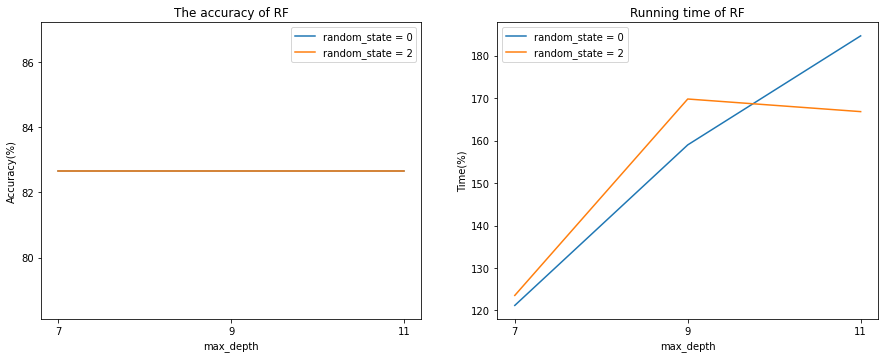

In [40]:
plt.figure(figsize = (15,12))

plt.subplot(2,2,1)
plt.plot(para_grid_rf["max_depth"],acc_rf[0])
plt.plot(para_grid_rf["max_depth"],acc_rf[1])
plt.legend(["random_state = 0","random_state = 2"])
plt.xticks(para_grid_rf["max_depth"])
plt.title("The accuracy of RF")
plt.ylabel("Accuracy(%)")
plt.xlabel("max_depth")   
           
plt.subplot(2,2,2)
plt.plot(para_grid_rf["max_depth"],time_rf[0])
plt.plot(para_grid_rf["max_depth"],time_rf[1])
plt.legend(["random_state = 0","random_state = 2"])
plt.xticks(para_grid_rf["max_depth"])
plt.title("Running time of RF")
plt.ylabel("Time(%)")
plt.xlabel("max_depth")   

plt.show()

In [23]:
###Roandom Forset(RF) with 5 fold
from sklearn.ensemble import RandomForestClassifier
RF_score=[]
RF_time=[]
kfold = KFold(n_splits=5)
rfscore_sum=0
for train_index, test_index in kfold.split(X_train, y_train):
    this_train_x, this_train_y = X_train[train_index], y_train[train_index]  
    this_test_x, this_test_y = X_train[test_index], y_train[test_index]  
    
    RFclassifier = RandomForestClassifier(max_depth=11, min_samples_leaf=2, 
                                          n_estimators=500,min_samples_split=10,
                                          random_state=0)
    RFclassifier.fit(this_train_x,this_train_y)
    prediction = RFclassifier.predict(this_test_x)      

    score = accuracy_score(this_test_y, prediction)
    print(score)
    RF_score.append(score)
    start=time.time()
    prediction = RFclassifier.predict(test_norm)
    end=time.time()
    print('Finish classifying, it takes '+str(end-start)+'s')
    RF_time.append(end-start)
    rfscore_sum = rfscore_sum+score

0.8606060606060606
Finish classifying, it takes 0.8252971172332764s
0.8488215488215488
Finish classifying, it takes 0.5999958515167236s
0.8653198653198653
Finish classifying, it takes 0.6478431224822998s
0.858922558922559
Finish classifying, it takes 0.5890023708343506s
0.8553872053872054
Finish classifying, it takes 0.6040041446685791s


In [24]:
rfscore_sum/5

0.8578114478114479

In [25]:
best_acc= max(knnscore_sum/5,svmscore_sum/5, lrscore_sum/5, rfscore_sum/5)
best_acc

0.8578114478114479

# 4. output

In [26]:
# test_input.csv includes 5000 samples used for label prediction. Test samples do not have labels.
data_test_df = pd.read_csv('./Input/test/test_input.csv')

In [27]:
data_test_df.head()

,id,v1,v2,v3,v4,...,v780,v781,v782,v783,v784
0,0,0,0,0,0,...,0,0,0,0,0
1,1,0,0,0,0,...,0,0,0,0,0
2,2,0,0,0,0,...,0,0,0,0,0
3,3,0,0,0,0,...,0,0,0,0,0
4,4,0,0,0,0,...,0,0,0,0,0


In [28]:
y_pred_best = RFclassifier.predict(test_norm)
y_pred_best

array([1, 1, 1, ..., 5, 0, 2], dtype=int64)

In [29]:
# assume output is the predicted labels from classifiers using input as data from test_input.csv
# (5000,)


output_df = pd.DataFrame(y_pred_best, columns = ['label'])
output_df.to_csv('./Output/test_output.csv', sep=",", float_format='%d', index_label="id")
